# Live video

In [1]:
import cv2
import glob

In [2]:
#images = [cv2.imread(file) for file in glob.glob('SIH-Cyclone-master/data/cyclone/Amphan/*.jpg')]

In [3]:
while True:
    k=0
    for file in glob.glob('SIH-Cyclone-master/data/cyclone/Amphan/*'):
        image = cv2.imread(file)
        cv2.imshow('1',image)
        if cv2.waitKey(10)==13:
            k=1
            break
    if k==1:
        break
cv2.destroyAllWindows()

# Area

In [36]:
m = cv2.imread('annotated_image.png')
grayImage = cv2.cvtColor(m, cv2.COLOR_BGR2GRAY)

In [37]:
m

array([[[ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253],
        ...,
        [ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253]],

       [[ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253],
        ...,
        [ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253]],

       [[ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253],
        ...,
        [ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253]],

       ...,

       [[ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       [[ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 84,   1,  68]],

       [[ 36, 231, 253],
        [ 36, 231, 253],
        [ 36, 231, 253],
        ...,
        [ 84,   1,  68],
        [ 84,   1,  68],
        [ 36, 231, 253]]

In [38]:
cv2.imshow('1',grayImage)
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
grayImage

array([[215, 215, 215, ..., 215, 215, 215],
       [215, 215, 215, ..., 215, 215, 215],
       [215, 215, 215, ..., 215, 215, 215],
       ...,
       [215, 215, 215, ...,  30,  30,  30],
       [215, 215, 215, ...,  30,  30,  30],
       [215, 215, 215, ...,  30,  30, 215]], dtype=uint8)

In [40]:
grayImage_list = grayImage.tolist()

white = sum([i.count(215) for i in grayImage_list])
black = sum([i.count(30) for i in grayImage_list])

In [41]:
grayImage.shape

(128, 128)

In [42]:
black

5800

In [43]:
white

10584

In [44]:
black + white == 600*600

False

In [45]:
area_of_cyclone = (black/(black+white))*100

area_of_cyclone

35.400390625

# Classification

In [1]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
l_img = cv2.imread('test_image016.png')

In [4]:
img = l_img[470:,300:,:]

In [5]:
cv2.imshow('1',img)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\highgui\src\window.cpp:404: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [8]:
len(img)

367

In [9]:
kernel1 = np.ones( (3,3), dtype=np.uint8 )

In [10]:
erode_img1 = cv2.erode(img,kernel1,iterations=2)
dil_img1 = cv2.dilate(erode_img1,kernel1)

cv2.imshow('1',img)

cv2.imshow('2',erode_img1)
cv2.imwrite('img.png', erode_img1)

cv2.imshow('3',dil_img1)


cv2.waitKey()
cv2.destroyAllWindows()

In [6]:

import cv2

In [7]:
model = tf.keras.models.load_model('model_cyclone.h5')

In [8]:
img = cv2.imread('test_image016.png')

In [9]:
img = cv2.resize(img,(128,128))     # resize image to match model's expected sizing
img = img.reshape(1,128,128,3)

In [10]:
#img = resize(img, (128, 128), mode='constant', preserve_range=True)

In [11]:
pred = model.predict(img)

In [12]:
preds = (pred >0.3).astype(np.uint8)

In [13]:
from skimage.io import imread, imshow, imsave

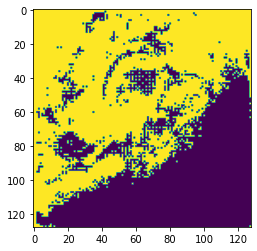

In [14]:
#imshow(img)
#plt.show()
#imshow(np.squeeze(Y_train[ix]))
#plt.show()
plt.imshow(np.squeeze(preds))
#plt.show()
plt.imsave('a.png',np.squeeze(preds))

In [31]:
cv2.imwrite("a_img.jpeg", np.squeeze(preds))

True

In [32]:
preds

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [1]]]], dtype=uint8)

In [33]:
a_img = cv2.imread('a_img.jpg')


In [34]:
a_img

In [35]:
#dil_img1